# Project 11 - Anthony Micco

**TA Help:** N/A
    
**Collaboration:** N/A

## Question 1

In [1]:
# imports
import pandas as pd
import geopandas as gpd

In [2]:
# reading in file to see column values
testDF = pd.read_csv("/anvil/projects/tdm/data/taxi/yellow/yellow_tripdata_2009-01.csv", usecols=[1,5,6])
testDF

,Trip_Pickup_DateTime,Start_Lon,Start_Lat
0,2009-01-04 02:52:00,-73.991957,40.721567
1,2009-01-04 03:31:00,-73.982102,40.736290
2,2009-01-03 15:43:00,-74.002587,40.739748
3,2009-01-01 20:52:58,-73.974267,40.790955
4,2009-01-24 16:18:23,-74.001580,40.719382
...,...,...,...
14092408,2009-01-27 14:36:00,-73.982013,40.743330
14092409,2009-01-27 13:56:00,-73.972788,40.761988
14092410,2009-01-23 08:39:44,-73.977467,40.751861
14092411,2009-01-24 23:05:00,-73.981295,40.753000


In [3]:
#defining the function 
def extractdate(year:str, month:str, day:str):
    #reading in the correct csv based on user input
    myDF = pd.read_csv(f"/anvil/projects/tdm/data/taxi/yellow/yellow_tripdata_{year}-{month}.csv", usecols=[1,5,6])

    #returning the dataframe
    return myDF

In [4]:
#calling the function with the date 08-14-2009 
extractdate("2009", "08", "14")

,Trip_Pickup_DateTime,Start_Lon,Start_Lat
0,2009-08-12 07:28:00,0.000000,0.000000
1,2009-08-12 12:03:00,-73.964567,40.772907
2,2009-08-12 17:42:00,-73.949728,40.784520
3,2009-08-11 09:34:00,-73.955885,40.782272
4,2009-08-12 13:56:00,-74.005328,40.728048
...,...,...,...
13686515,2009-08-11 07:03:00,-73.990705,40.750893
13686516,2009-08-11 17:53:00,-73.988997,40.757995
13686517,2009-08-11 06:44:00,-73.997953,40.735693
13686518,2009-08-11 15:24:00,-73.972078,40.760098


## Question 2

In [5]:
#revising the function to return only the drives on the specified date
def extractdateV2(year:str, month:str, day:str):
    #reading in data from correct dataframe
    myDF = pd.read_csv(f"/anvil/projects/tdm/data/taxi/yellow/yellow_tripdata_{year}-{month}.csv", usecols=[1,5,6])

    #checking to make sure the date input is correct
    checkedYear = pd.to_datetime(myDF['Trip_Pickup_DateTime']).dt.year == int(year)
    checkedMonth = pd.to_datetime(myDF['Trip_Pickup_DateTime']).dt.month == int(month)
    checkedDay = pd.to_datetime(myDF['Trip_Pickup_DateTime']).dt.day == int(day)
    
    # Combine checked values to filter the rows for rides that started on the specified date
    checkedDate = checkedYear & checkedMonth & checkedDay
    filteredDF = myDF[checkedDate]
    
    # Return the filtered DataFrame if there are matching records
    if not filteredDF.empty:
        return filteredDF
    else:
        return "The date is not included in data set"

In [6]:
extractdateV2("2009", "05", "29")

,Trip_Pickup_DateTime,Start_Lon,Start_Lat
9,2009-05-29 11:36:28,-73.991699,40.738751
15,2009-05-29 22:03:20,-73.968066,40.759642
1492,2009-05-29 02:25:00,-74.007013,40.711895
1496,2009-05-29 00:49:00,-73.976188,40.765588
1498,2009-05-29 09:15:00,-73.952235,40.772128
...,...,...,...
14796231,2009-05-29 02:12:00,-73.985398,40.762976
14796240,2009-05-29 15:15:52,-73.959823,40.762451
14796243,2009-05-29 06:53:22,-73.962236,40.779161
14796270,2009-05-29 05:58:24,-74.001003,40.741484


In [7]:
extractdateV2("2009", "02", "14")

,Trip_Pickup_DateTime,Start_Lon,Start_Lat
106,2009-02-14 18:35:00,-73.961608,40.775077
113,2009-02-14 18:12:00,-73.970985,40.763825
155,2009-02-14 02:46:00,-73.992732,40.734722
160,2009-02-14 19:30:00,-73.989440,40.741788
174,2009-02-14 02:43:00,-73.982065,40.776820
...,...,...,...
13380005,2009-02-14 02:10:02,-73.963576,40.756804
13380006,2009-02-14 01:07:41,-73.967842,40.757022
13380007,2009-02-14 12:18:13,-74.006143,40.733894
13380009,2009-02-14 02:34:30,-73.983342,40.760879


## Question 3

In [12]:
#defining the third version of the extractdate function
def extractdateV3(year:str, month:str, day:str):
    #reading in data from correct dataframe
    myDF = pd.read_csv(f"/anvil/projects/tdm/data/taxi/yellow/yellow_tripdata_{year}-{month}.csv", usecols=[1,5,6])

    #checking to make sure the date input is correct
    checkedYear = pd.to_datetime(myDF['Trip_Pickup_DateTime']).dt.year == int(year)
    checkedMonth = pd.to_datetime(myDF['Trip_Pickup_DateTime']).dt.month == int(month)
    checkedDay = pd.to_datetime(myDF['Trip_Pickup_DateTime']).dt.day == int(day)
    
    # Combine checked values to filter the rows for rides that started on the specified date
    checkedDate = checkedYear & checkedMonth & checkedDay
    filteredDF = myDF[checkedDate]

    #creating the geo data frame 
    gdf = gpd.GeoDataFrame(filteredDF, geometry=gpd.points_from_xy(filteredDF.Start_Lon, filteredDF.Start_Lat), crs="NAD83")
    
    return gdf.plot() 

<Axes: >

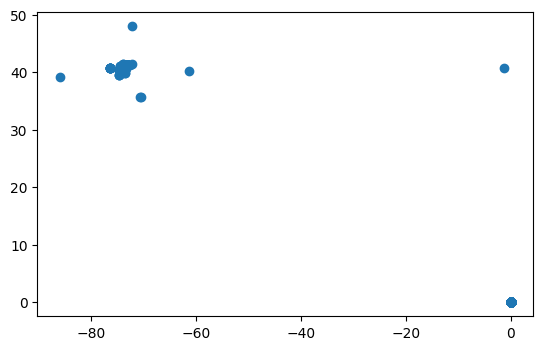

In [9]:
extractdateV3("2009", "02", "14")

## Question 4

In [14]:
#defining the fourth version of the extractdate function
def extractdateV4(year:str, month:str, day:str):
    #reading in data from correct dataframe
    myDF = pd.read_csv(f"/anvil/projects/tdm/data/taxi/yellow/yellow_tripdata_{year}-{month}.csv", usecols=[1,5,6])

    #checking to make sure the date input is correct
    checkedYear = pd.to_datetime(myDF['Trip_Pickup_DateTime']).dt.year == int(year)
    checkedMonth = pd.to_datetime(myDF['Trip_Pickup_DateTime']).dt.month == int(month)
    checkedDay = pd.to_datetime(myDF['Trip_Pickup_DateTime']).dt.day == int(day)
    
    # Combine checked values to filter the rows for rides that started on the specified date
    checkedDate = checkedYear & checkedMonth & checkedDay
    filteredDF = myDF[checkedDate]

    #filtering the dataframe based on the latitude and longitude values
    filteredLonDF = filteredDF[(filteredDF["Start_Lon"] >= -74.27) & (filteredDF["Start_Lon"] <= -73.68)]
    fullFiltered = filteredLonDF[(filteredLonDF["Start_Lat"] >= 40.49) & (filteredLonDF["Start_Lat"] <= 40.92)]

    #creating the geo data frame 
    gdf = gpd.GeoDataFrame(fullFiltered, geometry=gpd.points_from_xy(fullFiltered.Start_Lon, fullFiltered.Start_Lat), crs="NAD83")
    
    return gdf.plot() 

<Axes: >

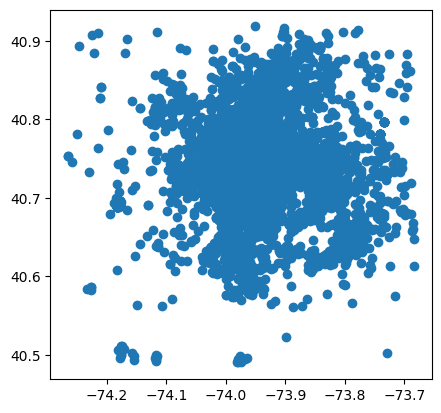

In [15]:
extractdateV4("2009", "02", "14")

## Question 5

In [16]:
#defining the final version of the extractdate function
def extractdateV5(year:str, month:str, day:str):
    #reading in data from correct dataframe
    myDF = pd.read_csv(f"/anvil/projects/tdm/data/taxi/yellow/yellow_tripdata_{year}-{month}.csv", usecols=[1,5,6])

    #checking to make sure the date input is correct
    checkedYear = pd.to_datetime(myDF['Trip_Pickup_DateTime']).dt.year == int(year)
    checkedMonth = pd.to_datetime(myDF['Trip_Pickup_DateTime']).dt.month == int(month)
    checkedDay = pd.to_datetime(myDF['Trip_Pickup_DateTime']).dt.day == int(day)
    
    # Combine checked values to filter the rows for rides that started on the specified date
    checkedDate = checkedYear & checkedMonth & checkedDay
    filteredDF = myDF[checkedDate]

    #filtering the dataframe based on the latitude and longitude values
    filteredLonDF = filteredDF[(filteredDF["Start_Lon"] >= -74.27) & (filteredDF["Start_Lon"] <= -73.68)]
    fullFiltered = filteredLonDF[(filteredLonDF["Start_Lat"] >= 40.49) & (filteredLonDF["Start_Lat"] <= 40.92)]

    #creating the geo data frame 
    gdf = gpd.GeoDataFrame(fullFiltered, geometry=gpd.points_from_xy(fullFiltered.Start_Lon, fullFiltered.Start_Lat), crs="NAD83")
    
    return gdf.plot(markersize = 0.1) 

<Axes: >

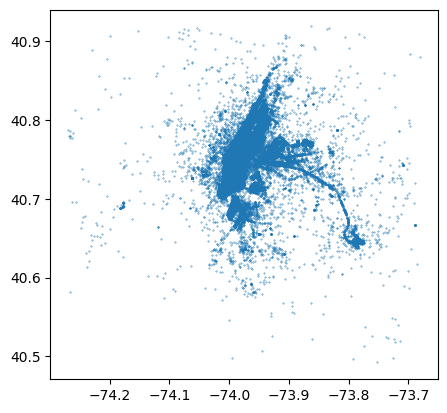

In [17]:
extractdateV5("2009", "05", "29")

<Axes: >

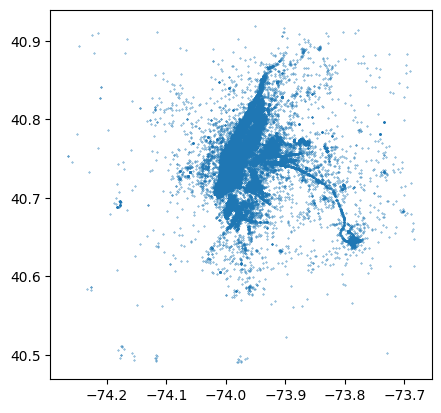

In [18]:
extractdateV5("2009", "02", "14")

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.